In [4]:
import csv
import random
import datetime
import re

# Lista de tipos de producto
tipos_producto = [1, 2, 3, 4]

# Lista de tipos de cliente
tipos_cliente = ["J", "F"]

# Lista de tipos de documento
tipos_documento = ["CI", "RUC", "Pasaporte"]

# Lista de empresas
empresas = ["Banco Continental SAECA", "Vision Banco SAECA", "Banco Atlas SAECA"]

# Expresión regular para validar el RUC
ruc_pattern = r"^[0-9]+[A-Z]?(-[0-9])?$"

def generar_ruc():
    digitos = str(random.randint(100000000, 999999999))  # Generar 9 dígitos aleatorios
    letra = random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ')  # Generar una letra mayúscula aleatoria
    guion = '-' if random.random() < 0.5 else ''  # Agregar un guion con una probabilidad del 50%

    ruc = digitos + letra + guion + random.choice('0123456789')
    if re.match(ruc_pattern, ruc):
        return ruc
    else:
        return generar_ruc()

# Generar dataset de 1000 registros
dataset = []
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

for _ in range(1000):
    # Generar valores aleatorios para cada columna
    ruc = generar_ruc()
    razon_social = random.choice(empresas)
    cliekey = random.randint(1000, 9999)
    tipo_cliente = random.choice(tipos_cliente)
    tipo_documento = random.choice(tipos_documento)
    nro_documento = str(random.randint(10000000, 99999999))
    cod_producto = random.randint(1, 100)
    cant_venta = random.randint(1, 10)
    tipo_producto = random.choice(tipos_producto)
    precio_unitario = random.randint(1, 100) * 1000  # Monto en guaraníes sin decimales
    monto_total = precio_unitario * cant_venta

    # Generar fecha de venta dentro del rango de enero de 2023 a diciembre de 2023
    fecha_venta = start_date + (end_date - start_date) * random.random()

    # Agregar registro al dataset
    registro = [ruc, razon_social, cliekey, tipo_cliente, tipo_documento, nro_documento, cod_producto, cant_venta, tipo_producto, precio_unitario, monto_total, fecha_venta.strftime("%Y-%m-%d")]
    dataset.append(registro)

    # Imprimir datos en pantalla

    #print("Registro generado:")
    #print(f"RUC: {ruc}")
    #print(f"Razón Social: {razon_social}")
    #print(f"Cliekey: {cliekey}")
    #print(f"Tipo de Cliente: {tipo_cliente}")
    #print(f"Tipo de Documento: {tipo_documento}")
    #print(f"Nro. de Documento: {nro_documento}")
    #print(f"Cod. de Producto: {cod_producto}")
    #print(f"Cantidad de Venta: {cant_venta}")
    #print(f"Tipo de Producto: {tipo_producto}")
    #print(f"Precio Unitario: {precio_unitario}")
    #print(f"Monto Total: {monto_total}")
    #print(f"Fecha de Venta: {fecha_venta.strftime('%Y-%m-%d')}")
    #print("")

# Guardar dataset en archivo CSV
nombre_archivo = "dataset.csv"
with open(nombre_archivo, "w", newline="") as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    escritor_csv.writerow(["ruc", "razon_social", "cliekey", "tipo_cliente", "tipo_documento", "nro_documento", "cod_producto", "cant_venta", "tipo_producto", "precio_unitario", "monto_total", "fecha_venta"])
    escritor_csv.writerows(dataset)

print(f"El dataset se ha guardado en el archivo '{nombre_archivo}'.")

El dataset se ha guardado en el archivo 'dataset.csv'.


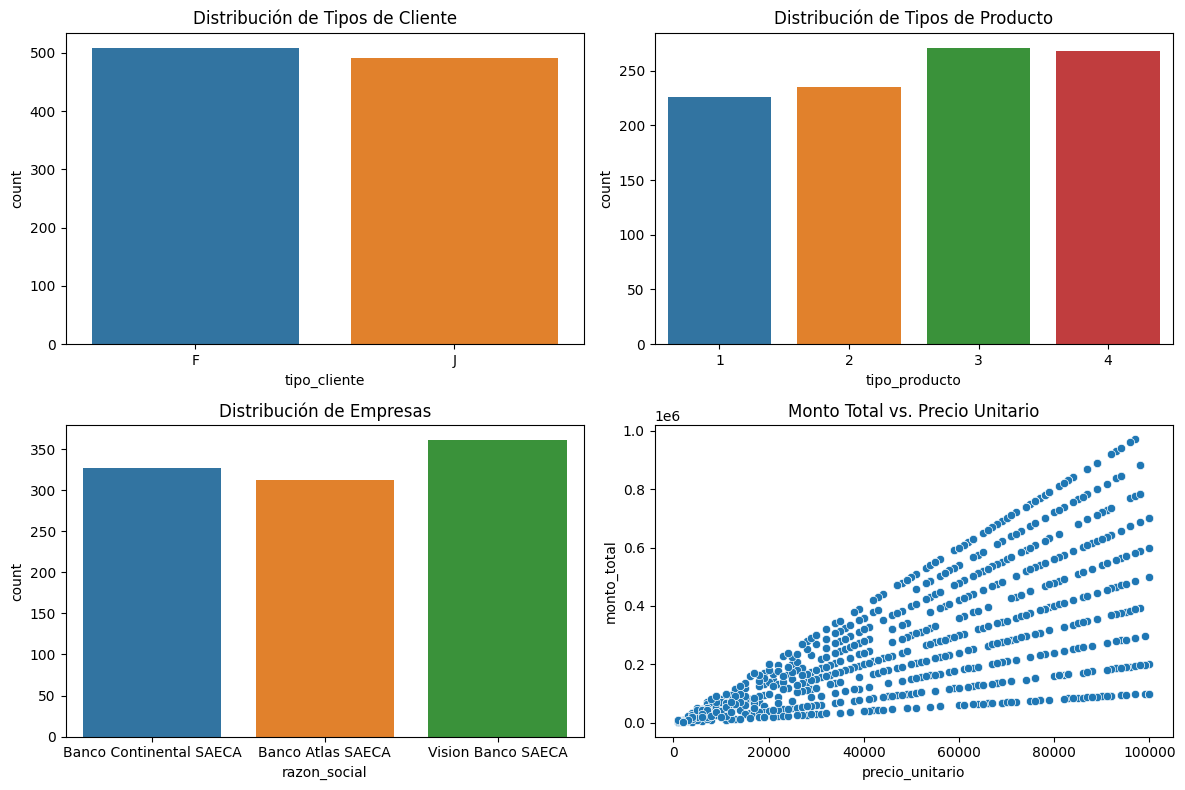

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset desde el archivo CSV
nombre_archivo = "dataset.csv"
df = pd.read_csv(nombre_archivo)

# Crear una figura de matplotlib
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de barras de la distribución de tipos de cliente
sns.countplot(data=df, x="tipo_cliente", ax=axes[0, 0])
axes[0, 0].set_title("Distribución de Tipos de Cliente")

# Gráfico de barras de la distribución de tipos de producto
sns.countplot(data=df, x="tipo_producto", ax=axes[0, 1])
axes[0, 1].set_title("Distribución de Tipos de Producto")

# Gráfico de barras de la distribución de empresas
sns.countplot(data=df, x="razon_social", ax=axes[1, 0])
axes[1, 0].set_title("Distribución de Empresas")

# Gráfico de dispersión de monto total vs. precio unitario
sns.scatterplot(data=df, x="precio_unitario", y="monto_total", ax=axes[1, 1])
axes[1, 1].set_title("Monto Total vs. Precio Unitario")

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico en pantalla
plt.show()